In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read in csv 
df = pd.read_csv("../Resources/race_data.csv")

In [3]:
df.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298


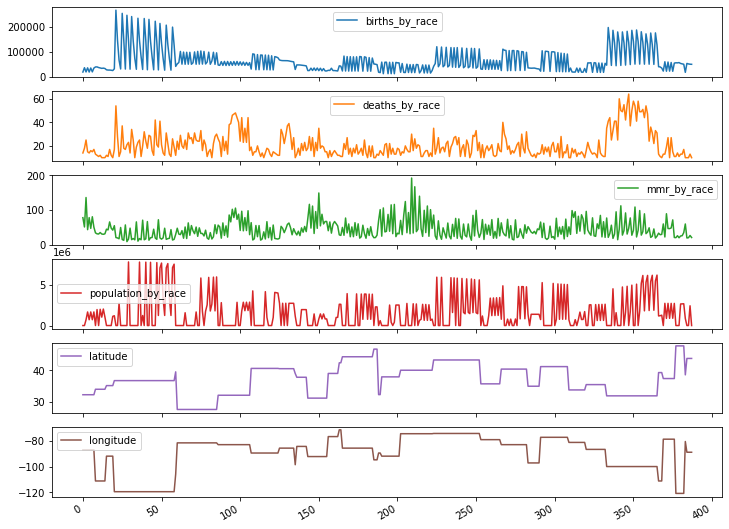

In [7]:
df_plots = df.iloc[:,5:].plot(subplots=True, figsize=(12,10))

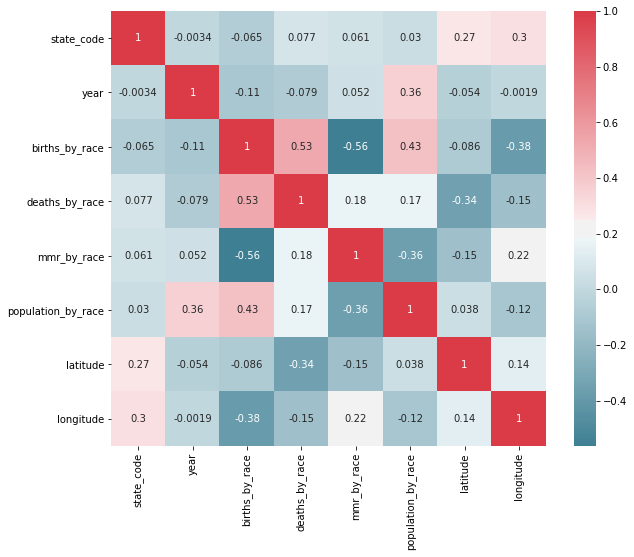

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

n = df

corr = df.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, annot=True, ax=ax)

In [20]:
# setting our X and y values 
X = df[["race", "hispanic_origin"]]
y = df["mmr_by_race"].values.reshape(-1, 1)
print(X.shape, y.shape)

(388, 2) (388, 1)


In [21]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["race", "hispanic_origin"])
data_binary_encoded.head()

,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,0,1,0,0,1
1,0,0,1,0,1
2,0,1,0,0,1
3,0,0,1,0,1
4,0,1,0,0,1


In [22]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
145,0,0,1,0,1
7,0,0,1,0,1
19,0,0,1,0,1
262,0,1,0,0,1
367,0,0,1,0,1


In [23]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

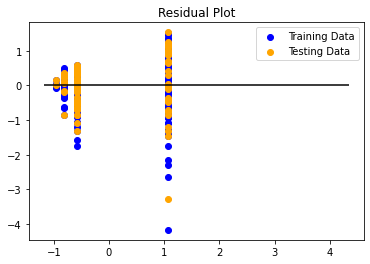

In [25]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.42792022648449185, R2: 0.5869879062874108
